In [203]:
import pandas as pd
import numpy as np
import seaborn as sns

In [293]:
# load text
# source: https://ourworldindata.org/suicide

In [83]:
df = pd.read_csv('./data/suicide-death-rates.csv')
print(df.shape)

(6468, 4)


In [84]:
df.columns = ['Entity', 'Code', 'Year', 'Deaths_rate']
df.head()

,Entity,Code,Year,Deaths_rate
0,Afghanistan,AFG,1990,10.318504
1,Afghanistan,AFG,1991,10.327010
2,Afghanistan,AFG,1992,10.271411
3,Afghanistan,AFG,1993,10.376123
4,Afghanistan,AFG,1994,10.575915


In [85]:
# classify countries, and regions

In [89]:
# drop na
df2 = df.dropna()

# select idx from countries
idx = list(df2.index)

# idx of non countries
idx_not_country = [i for i in range(idx[-1]) if i not in idx]

# df non_countries
df_not_country = df.iloc[idx_not_country]
df_not_country.head()

,Entity,Code,Year,Deaths_rate
112,Andean Latin America,NaN,1990,5.200335
113,Andean Latin America,NaN,1991,5.238619
114,Andean Latin America,NaN,1992,5.564100
115,Andean Latin America,NaN,1993,5.790940
116,Andean Latin America,NaN,1994,5.856975


In [123]:
df2017 = df2[df2.Year == 2017]
df2017 = df2017[df2017.Code != 'OWID_WRL']

In [124]:
df.Code.iloc[112]

nan

In [132]:
df[df.Entity == 'Lithuania']

,Entity,Code,Year,Deaths_rate
3276,Lithuania,LTU,1990,27.969919
3277,Lithuania,LTU,1991,30.868981
3278,Lithuania,LTU,1992,32.840418
3279,Lithuania,LTU,1993,39.460394
3280,Lithuania,LTU,1994,44.145950
3281,Lithuania,LTU,1995,44.773387
3282,Lithuania,LTU,1996,42.797108
3283,Lithuania,LTU,1997,40.783079
3284,Lithuania,LTU,1998,40.659034
3285,Lithuania,LTU,1999,40.140720


In [137]:
df2017.sort_values(by='Deaths_rate', ascending=False).head(10)

,Entity,Code,Year,Deaths_rate
2267,Greenland,GRL,2017,51.063239
3219,Lesotho,LSO,2017,31.715218
3303,Lithuania,LTU,2017,27.990584
6467,Zimbabwe,ZWE,2017,26.391769
3023,Kiribati,KIR,2017,26.378631
2435,Guyana,GUY,2017,26.072110
6019,Ukraine,UKR,2017,25.622225
4703,Russia,RUS,2017,25.087669
5515,Suriname,SUR,2017,24.783072
4451,Papua New Guinea,PNG,2017,23.074353


In [180]:
df3 = df.copy()
df3.index = df.Year
df3 = df3[['Entity', 'Deaths_rate']]

In [211]:
eu_mediterranea = df3[(df3.Entity == 'Portugal') | (df3.Entity == 'Spain') | (df3.Entity == 'Italy') | (df3.Entity == 'Greece') | (df3.Entity == 'Turkey')]
eu_mediterranea.shape

(140, 2)

In [215]:
import pygal

In [307]:
custom_style = pygal.style.Style(
  background='transparent',
  plot_background='transparent',
  foreground='transparent',
  foreground_strong='transparent',
  foreground_subtle='transparent',
  opacity='.6',
  opacity_hover='.9',
  transition='400ms ease-in',
  colors=('#E853A0', '#E8537A', '#E95355', '#E87653', '#E89B53'))

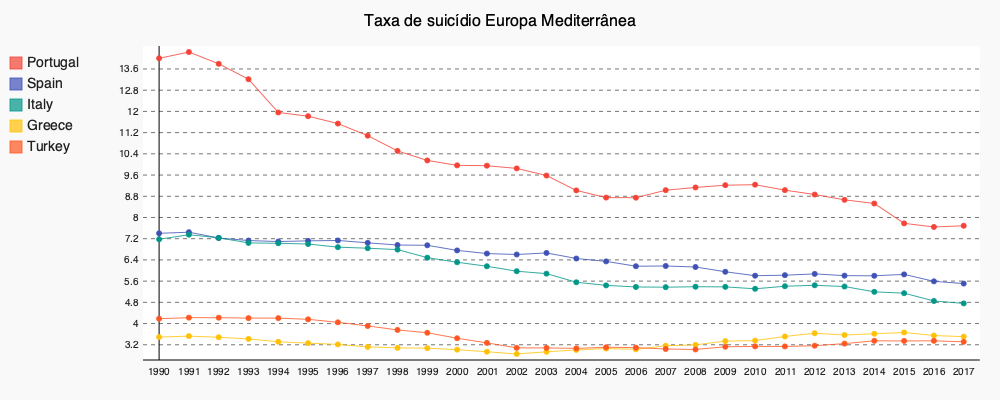

In [308]:
line_chart = pygal.Line(width=1000, 
                        height=400, 
                        explicit_size=True, 
                        min_scale=40,
                        custom_style=custom_style
                       )
line_chart.title = 'Taxa de suicídio Europa Mediterrânea'
line_chart.x_labels = list(set(df3.index))

eu_countries = ['Portugal', 'Spain', 'Italy', 'Greece']

for i in eu_countries:
    line_chart.add(i, df3[df3.Entity==i].Deaths_rate.to_list())
    
line_chart.add('Turkey', df3[df3.Entity=='Turkey'].Deaths_rate.to_list())

In [303]:
line_chart.render_in_browser()

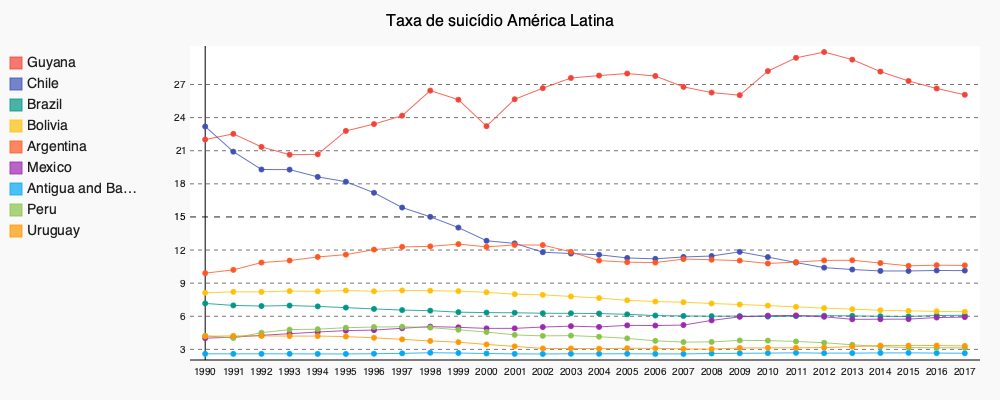

In [327]:
line_chart = pygal.Line(width=1000, 
                        height=400, 
                        explicit_size=True, 
                        min_scale=40,
                        custom_style=custom_style
                       )
line_chart.title = 'Taxa de suicídio América Latina'
line_chart.x_labels = list(set(df3.index))

eu_countries = ['Guyana', 'Chile', 'Brazil', 'Bolivia', 'Argentina', 'Mexico', 'Antigua and Barbuda', 'Peru']

for i in eu_countries:
    line_chart.add(i, df3[df3.Entity==i].Deaths_rate.to_list())
    
line_chart.add('Uruguay', df3[df3.Entity=='Turkey'].Deaths_rate.to_list())

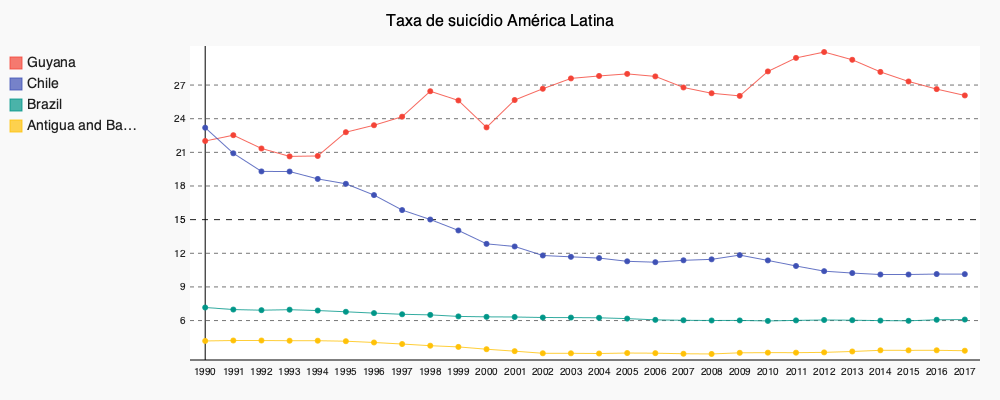

In [328]:
line_chart = pygal.Line(width=1000, 
                        height=400, 
                        explicit_size=True, 
                        min_scale=40,
                        custom_style=custom_style
                       )
line_chart.title = 'Taxa de suicídio América Latina'
line_chart.x_labels = list(set(df3.index))

eu_countries = ['Guyana', 'Chile', 'Brazil']

for i in eu_countries:
    line_chart.add(i, df3[df3.Entity==i].Deaths_rate.to_list())
    
line_chart.add('Antigua and Barbuda', df3[df3.Entity=='Turkey'].Deaths_rate.to_list())

In [329]:
line_chart.render_in_browser()

file:///var/folders/zx/plpqjh0n3mv5_t81883pv0040000gn/T/tmp8ma1jj_h.html
